<a href="https://colab.research.google.com/github/SandunGitHub/UOM_Research/blob/main/Feature_Engineering/Section_02_Personal_Research_ProjectDFU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section 02: Personal Research Project
Testing of 2D iamges in the plnatarthermogram database

Testing of MobilenetV2, Resnet18, Resnet50, DenseNet201, InceptionV3 and VGG13 to classify the CM with DM

In the process, new featutres will be additionally generated

The information of the library:
CG : 45
DM : 122

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing all important libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
import cv2
from PIL import Image
import PIL
import imgaug.augmenters as iaa
import datetime

import random
import pathlib
import tensorflow as tf


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import MinMaxScaler






In [ ]:
image_path = '/content/drive/MyDrive/Images/All_Foot/CG/L/CG001_M_L.png'
image = cv2.imread(image_path)
img_height, img_width = image.shape[:2]

print(f"Image width: {img_width} pixels")
print(f"Image height: {img_height} pixels")

Image width: 65 pixels
Image height: 168 pixels


Reading the files from DB

In [ ]:
#file directory
CG_directory_L = '/content/drive/MyDrive/Images/All_Foot/CG/L'
CG_directory_R = '/content/drive/MyDrive/Images/All_Foot/CG/R'

DM_directory_L = '/content/drive/MyDrive/Images/All_Foot/DM/L'
DM_directory_R = '/content/drive/MyDrive/Images/All_Foot/DM/R'

#extracting the names
CG_directory_L_ = os.listdir(CG_directory_L)
CG_directory_R_ = os.listdir(CG_directory_R)

DM_directory_L_ = os.listdir(DM_directory_L)
DM_directory_R_ = os.listdir(DM_directory_R )

#filtering images
CG_png_files_L          = [filename for filename in CG_directory_L_ if '_L' in filename and filename.endswith('.png')]
CG_png_files_R          = [filename for filename in CG_directory_R_ if '_R' in filename and filename.endswith('.png')]

DM_png_files_L          = [filename for filename in DM_directory_L_ if '_L' in filename and filename.endswith('.png')]
DM_png_files_R          = [filename for filename in DM_directory_R_ if '_R' in filename and filename.endswith('.png')]

DM_png_files_L_         = DM_png_files_L[0:100]
DM_png_files_R_         = DM_png_files_R[0:100]

print(CG_png_files_L)
print(CG_png_files_R)



['CG001_M_L.png', 'CG002_M_L.png', 'CG003_M_L.png', 'CG004_F_L.png', 'CG005_F_L.png', 'CG006_F_L.png', 'CG007_F_L.png', 'CG008_F_L.png', 'CG009_M_L.png', 'CG010_M_L.png', 'CG011_F_L.png', 'CG012_F_L.png', 'CG013_M_L.png', 'CG014_M_L.png', 'CG015_M_L.png', 'CG016_M_L.png', 'CG017_F_L.png', 'CG018_M_L.png', 'CG019_F_L.png', 'CG020_F_L.png', 'CG021_M_L.png', 'CG022_M_L.png', 'CG023_F_L.png', 'CG024_F_L.png', 'CG025_M_L.png', 'CG026_M_L.png', 'CG027_M_L.png', 'CG028_M_L.png', 'CG029_F_L.png', 'CG030_M_L.png', 'CG031_M_L.png', 'CG032_M_L.png', 'CG033_M_L.png', 'CG034_M_L.png', 'CG035_M_L.png', 'CG036_M_L.png', 'CG037_M_L.png', 'CG038_M_L.png', 'CG039_M_L.png', 'CG040_M_L.png', 'CG041_F_L.png', 'CG042_F_L.png', 'CG043_M_L.png', 'CG044_F_L.png', 'CG045_M_L.png']
['CG001_M_R.png', 'CG002_M_R.png', 'CG003_M_R.png', 'CG004_F_R.png', 'CG005_F_R.png', 'CG006_F_R.png', 'CG007_F_R.png', 'CG008_F_R.png', 'CG009_M_R.png', 'CG010_M_R.png', 'CG011_F_R.png', 'CG012_F_R.png', 'CG013_M_R.png', 'CG014_M_R.p

Data Augmentation techniques and multipying of images

In [ ]:
#CG Array
#Generating 1800 images from CG array
import time
CG_ARRAY = []
CG_ALL_AUGMENTED_IMAGES = []
CG_AUGMENTED = []
image_count = 0

# Addition of the Left and Right images together
CG_png_files_ = CG_png_files_L  + CG_png_files_R
DM_png_files_  = DM_png_files_L_ + DM_png_files_R_

# Load an example image (replace this with your own image loading code)


for file in CG_png_files_:
  if '_L' in file:
        png_file_path = os.path.join(CG_directory_L , file)
        image = Image.open(png_file_path)
        image_array = np.array(image)
        CG_ARRAY.append(image_array)

  elif '_R' in file:
        png_file_path = os.path.join(CG_directory_R , file)
        image = Image.open(png_file_path)
        image_array = np.array(image)
        CG_ARRAY.append(image_array)
  else :
        print("Path is invalid")


def flip(image)->np.ndarray:
  seq = iaa.Sequential([iaa.Fliplr(0.5)])                                      # Horizontal flip with a 50% chance
  augmented_image = seq(image=image)
  return  augmented_image

def Affine(image)->np.ndarray:
  seq = iaa.Sequential([iaa.Affine(rotate=(-20, 20))])                         # Rotate image by -20 to 20 degrees
  augmented_image = seq(image=image)
  return  augmented_image

def Gaussian_Blur(image)->np.ndarray:
  seq = iaa.Sequential([iaa.GaussianBlur(sigma=(0, 3.0))])                     # Apply Gaussian Blur
  augmented_image = seq(image=image)
  return  augmented_image

def Gaussian_Noise(image)->np.ndarray:
  seq = iaa.Sequential([iaa.AdditiveGaussianNoise(scale=(0, 0.05*255))])       # Apply Gaussian Blur
  augmented_image = seq(image=image)
  return  augmented_image

def Brightness(image)->np.ndarray:
  seq = iaa.Sequential([iaa.Multiply((0.5, 1.5))])                             # Apply Gaussian Blur
  augmented_image = seq(image=image)
  return  augmented_image

def Contrast_Normalization(image)->np.ndarray:
  seq = iaa.Sequential([iaa.ContrastNormalization((0.5, 1.5))])                # Apply Gaussian Blur
  augmented_image = seq(image=image)
  return  augmented_image

def Affine_Scale(image)->np.ndarray:
  seq = iaa.Sequential([iaa.Affine(scale=(0.5, 1.5))])                         # Apply affine
  augmented_image = seq(image=image)
  return  augmented_image

def Affine_Shear(image)->np.ndarray:
  seq = iaa.Sequential([iaa.PerspectiveTransform(scale=(0.01, 0.1))])                         # Apply affine
  augmented_image = seq(image=image)
  return  augmented_image

def Perspective_Transform(image)->np.ndarray:
  seq = iaa.Sequential([iaa.Affine(shear=(0.5, 1.5))])                         # Apply affine
  augmented_image = seq(image=image)
  return  augmented_image

def  Most_Noise(image)->np.ndarray:
  seq = augmentation_pipeline_all = iaa.Sequential([
  iaa.Fliplr(0.5),        # Horizontal flip with a 50% chance
  iaa.Affine(rotate=(-20, 20)),  # Rotate image by -20 to 20 degrees
  iaa.GaussianBlur(sigma=(0, 3.0)),  # Apply Gaussian blur
  iaa.AdditiveGaussianNoise(scale=(0, 0.05*255))  # Add Gaussian noise
                                                ])                              # Apply affine
  augmented_image = seq(image=image)
  return  augmented_image

def  Random_Noise(image,number)->np.ndarray:
  random_noise = [iaa.Fliplr(0.5),iaa.Affine(rotate=(-20, 20)),iaa.GaussianBlur(sigma=(0, 3.0)),iaa.AdditiveGaussianNoise(scale=(0, 0.05*255))]
  seq = augmentation_pipeline_all = iaa.Sequential([
  iaa.Fliplr(0.5),        # Horizontal flip with a 50% chance
  iaa.Affine(rotate=(-20, 20)),  # Rotate image by -20 to 20 degrees
  iaa.GaussianBlur(sigma=(0, 3.0)),  # Apply Gaussian blur
  iaa.AdditiveGaussianNoise(scale=(0, 0.05*255))  # Add Gaussian noise
                                                ])                              # Apply affine
  augmented_image = seq(image=image)
  return  augmented_image



operations = {
    "flip": flip ,
    "affine Scale": Affine_Scale,
    "gaussian blur": Gaussian_Blur,
    "brightness":Brightness,
    "gaussian additive noise":Gaussian_Noise,
    "contrast normalization":Contrast_Normalization,
    "affine scale":  Affine_Scale,
    "affine shear": Affine_Shear,
    "persceptive transform":Perspective_Transform,
    "most noise":Most_Noise
}

output_directory =  '/content/drive/MyDrive/All_Images/CG'


def saving_the_image(augmented_image,output_directory):
  global image_count
  image_count = image_count+1
  file_name = f'image_{image_count}.jpg'
  output_file_path = os.path.join(output_directory, file_name)
  # with open(output_file_path, 'wb') as image_augmented:
  # im1 = Image.open(r"C:\Users\System-Pc\Desktop\flower1.jpg")
  i = Image.fromarray(augmented_image)
  i.save(output_file_path)
  time.sleep(0.1)


def Augmnentation_pipeline(operation,cg_array, store_array)->np.ndarray:
    if operation in operations :
      operation_function = operations[operation]
      for cg_image in cg_array:
        operation_function = operations[random.choice(list(operations.keys()))]
        augmented_image = operation_function(image=cg_image)
        store_array.append(augmented_image)
        saving_the_image(augmented_image,output_directory)
        # saving_the_image(output_directory,augmented_image)
    elif operation == "multi":
      for cg_image in cg_array:
        operation_function = operations[random.choice(list(operations.keys()))]
        augmented_image = operation_function(image=cg_image)
        augmented_image_ = operations[random.choice(list(operations.keys()))](image=augmented_image)
        store_array.append(augmented_image_)
        saving_the_image(augmented_image_,output_directory)
        # saving_the_image(output_directory,augmented_image)
      return store_array

def pass_pipeline(cg_array, store_array)->np.ndarray:
  for cg_image in cg_array:
    store_array.append(cg_image)
    saving_the_image(cg_image,output_directory)
  return store_array



Augmnentation_pipeline("flip",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("affine Scale",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("gaussian blur",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("brightness",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("gaussian additive noise",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("contrast normalization",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("affine Scale",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("affine shear",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("most noise",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("persceptive transform",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
# Augmnentation_pipeline("multi",CG_ARRAY,CG_ALL_AUGMENTED_IMAGES)
pass_pipeline(CG_ARRAY, CG_ALL_AUGMENTED_IMAGES)
print(len(CG_ALL_AUGMENTED_IMAGES))












KeyboardInterrupt: ignored

In [ ]:
CG_Output = os.listdir('/content/drive/MyDrive/All_Images/CG')
#filtering images
CG_png_files         = [filename for filename in CG_Output if   filename.endswith('.jpg')]

print(len(CG_png_files))



1800


Augmentatation of DM data

In [ ]:
DM_png_files_  = DM_png_files_L_ + DM_png_files_R_
print(len(DM_png_files_))
output_directory =  '/content/drive/MyDrive/All_Images/DM'

#DM Array
#Generating 1800 images from DM array
DM_ARRAY = []
DM_ALL_AUGMENTED_IMAGES = []
DM_AUGMENTED = []
OUTPUT_IMAGE_DIRECTORY = '/content/drive/MyDrive/All_Images/DM'

for file in DM_png_files_:
  if '_L' in file:
        png_file_path = os.path.join(DM_directory_L , file)
        image = Image.open(png_file_path)
        image_array = np.array(image)
        DM_ARRAY.append(image_array)
  elif '_R' in file:
        png_file_path = os.path.join(DM_directory_R , file)
        image = Image.open(png_file_path)
        image_array = np.array(image)
        DM_ARRAY.append(image_array)
  else :
        print("Path is invalid")



Augmnentation_pipeline("multi",DM_ARRAY,DM_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",DM_ARRAY,DM_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",DM_ARRAY,DM_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",DM_ARRAY,DM_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",DM_ARRAY,DM_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",DM_ARRAY,DM_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",DM_ARRAY,DM_ALL_AUGMENTED_IMAGES)
Augmnentation_pipeline("multi",DM_ARRAY,DM_ALL_AUGMENTED_IMAGES)
pass_pipeline(DM_ARRAY,DM_ALL_AUGMENTED_IMAGES)
print(len(DM_ALL_AUGMENTED_IMAGES))

200
1800


In [ ]:
DM_Output = os.listdir('/content/drive/MyDrive/All_Images/DM')
#filtering images
DM_png_files         = [filename for filename in DM_Output  if   filename.endswith('.jpg')]

print(len(DM_png_files))


1800


checking, labeling and shuffling the data

In [ ]:
print(CG_ALL_AUGMENTED_IMAGES)
print(DM_ALL_AUGMENTED_IMAGES)
columns = ['X']

# Create a DataFrame
DF_CG = pd.DataFrame(CG_ALL_AUGMENTED_IMAGES, columns=columns)
DF_DM = pd.DataFrame(DM_ALL_AUGMENTED_IMAGES, columns=columns)
DF_CG['Y'] = 0
DF_DM['Y'] = 1
ALL_DATA = pd.concat([DF_CG, DF_DM], ignore_index=True)
ALL_DATA = ALL_DATA.sample(frac=1, random_state=42)  # random_state for reproducibility
#writing all the images in a directory

# for image in ALL_DATA:
#        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # OpenCV uses BGR, matplotlib uses RGB



def save_images_to_directory(images, output_directory):
    try:
        # Create the output directory if it doesn't exist
        if not os.path.exists(output_directory):
            os.makedirs(output_directory)

        # Save each image to the output directory
        for i, image in enumerate(images):
            output_path = os.path.join(output_directory, f"image_{i}.png")
            image.save(output_path)

        print(f"{len(images)} images saved to {output_directory}")
    except Exception as e:
        print("An error occurred:", e)

output = '/content/drive/MyDrive/All_Images'
save_images_to_directory(ALL_DATA, output)





[array([[[ 60,   0,  67],
        [181,   0, 202],
        [190,   0, 213],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[169,   3, 198],
        [179,   0, 208],
        [179,   0, 208],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[170,   0, 207],
        [171,   0, 206],
        [171,   0, 207],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/construction.py:568: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/construction.py:568: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you m

Testing it on pretrained networks
Analysis should be done via pre trained CNN architectures such as, MobilenetV2, Resnet18, Resnet50, DenseNet201, InceptionV3 and VGG13

Usind a custom model

In [ ]:
from PIL import Image

def rescale_image(input_path_array, scale_factor):
    try:
        for array in input_path_array:
          scaled_image = float(array)*float(scale_factor)
          print(f"{scaled_image}")
    except Exception as e:
        print("An error occurred:", e)

# Replace these paths with your actual image paths

scale_factor = 1.0/255  # Change this to the desired scale factor

rescale_image(ALL_DATA, scale_factor)


An error occurred: could not convert string to float: 'X'


Testing the custom made CNN on original data

1.   Accuracy
2.   Loss
3.   Recall
4.   Precision
5.   F1 Score



In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import roc_curve, auc
import keras.backend as K

def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val



#Acquire the images from All__Images directory then input into Keras Libraray

def is_valid_file(filename):
    return not filename.endswith('.ipynb_checkpoints')



directory = '/content/drive/MyDrive/All_Images_Original'
classes = [file for file in os.listdir(directory) if not  file.endswith('.ipynb_checkpoints') ]
print(classes)



ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=32,
)


len(ds)

#splitting the training set
train_size = int(0.8 * len(ds))
train_ds = ds.take(train_size)
test_ds = ds.skip(train_size)

X = []
y = []

for images, labels in ds:
    X.append(images.numpy())
    y.append(labels.numpy())

# X = tf.concat(X, axis=0)
# y = tf.concat(y, axis=0)


#fitering out the DM and CG fies
# print(ds.class_names)
# print(test_ds)
# n_class = len(ds.class_names)

#convert simple form
# fetch 1 batch and 1 batch have 32 files
for image_batch, lable_batch in test_ds.take(1):
  print('this is one bacth shape',image_batch.shape)
  print('this is label shape ',lable_batch.shape)


# for image_batch, lable_batch in test_ds.take(1):
#   print(image_batch.numpy())
#   print('\n')
#   print(lable_batch.numpy())

#increase the performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

#resize and rescale the value
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])


#data augmentation has already been done

#Craeting the model

input_shape = (32, img_height, img_width, 3)
model = Sequential()
model.add(resize_and_rescale)
model.add(Conv2D(32,kernel_size=(3,3),padding='same', activation='relu',input_shape=input_shape))
model.add(Conv2D(64,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.10))
# model.add(Dense(1))
model.add(Dense(1))
# model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()]) #resulting in 0 values under this catogory. Try different methods
# model.compile(optimizer='sgd',loss='mse',metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision(),tf.keras.metrics.AUC(  num_thresholds=200,curve="ROC",summation_method="interpolation",name=None,dtype=None,thresholds=None,multi_label=False,num_labels=None,label_weights=None,from_logits=False,)])
model.compile(optimizer='sgd',loss='mse',metrics=[sklearn.metrics.f1_score()])
model.build(input_shape)
model.summary()

epochs = 6

history = model.fit(
    train_ds,
    validation_data = test_ds,
    epochs = epochs
)




#plotting the ROC/AUC Curves








['CG', 'DM']
Found 334 files belonging to 2 classes.
this is one bacth shape (32, 128, 55, 3)
this is label shape  (32,)


NameError: ignored

Epochs = 6

Epochs = 10, Increasing the number of epochs to check whether there's is an improvemebt in the graphs

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


#Acquire the images from All__Images directory then input into Keras Libraray

def is_valid_file(filename):
    return not filename.endswith('.ipynb_checkpoints')



directory = '/content/drive/MyDrive/All_Images_Original'
classes = [file for file in os.listdir(directory) if not  file.endswith('.ipynb_checkpoints') ]
print(classes)



ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=32,
)


#splitting the training set
train_size = int(0.8 * len(ds))
train_ds = ds.take(train_size)
test_ds = ds.skip(train_size)

#fitering out the DM and CG fies
# print(ds.class_names)
# print(test_ds)
# n_class = len(ds.class_names)

#convert simple form
# fetch 1 batch and 1 batch have 32 files
for image_batch, lable_batch in test_ds.take(1):
  print('this is one bacth shape',image_batch.shape)
  print('this is label shape ',lable_batch.shape)


# for image_batch, lable_batch in test_ds.take(1):
#   print(image_batch.numpy())
#   print('\n')
#   print(lable_batch.numpy())

#increase the performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

#resize and rescale the value
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])


#data augmentation has already been done

#Craeting the model

input_shape = (32, img_height, img_width, 3)
model = Sequential()
model.add(resize_and_rescale)
model.add(Conv2D(32,kernel_size=(3,3),padding='same', activation='relu',input_shape=input_shape))
model.add(Conv2D(64,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(2))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.build(input_shape)
model.summary()

epochs = 6

history = model.fit(
    train_ds,
    validation_data = test_ds,
    epochs = epochs
)


acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')









# # Usage
# data_df = ALL_DATA
# img_height = 168
# img_width = 65
# n_classes = 2  # Replace with the actual number of classes
# batch_size = 32
# epochs = 10

# model, history = train_custom_model(data_df, img_height, img_width, n_classes, batch_size, epochs)


['CG', 'DM']
Found 334 files belonging to 2 classes.
this is one bacth shape (32, 168, 65, 3)
this is label shape  (32,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 168, 65, 3)          0         
                                                                 
 conv2d (Conv2D)             (32, 168, 65, 32)         896       
                                                                 
 conv2d_1 (Conv2D)           (32, 168, 65, 64)         18496     
                                                                 
 max_pooling2d (MaxPooling2D  (32, 84, 32, 64)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (32, 84, 32, 64)          36928     
                                                                 

NameError: ignored

The aforementioned gap needed to be improvived and all the parameters such as Recall, Precision, Accuracy, F1 score nedded to be improved.

Therefore, I made a db of 3600 images via augmentation.

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


#Acquire the images from All__Images directory then input into Keras Libraray

def is_valid_file(filename):
    return not filename.endswith('.ipynb_checkpoints')



directory = '/content/drive/MyDrive/All_Images'  #augmented images
classes = [file for file in os.listdir(directory) if not  file.endswith('.ipynb_checkpoints') ]
print(classes)



ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=32,
)


#splitting the training set
train_size = int(0.8 * len(ds))
train_ds = ds.take(train_size)
test_ds = ds.skip(train_size)

#fitering out the DM and CG fies
# print(ds.class_names)
# print(test_ds)
# n_class = len(ds.class_names)

#convert simple form
# fetch 1 batch and 1 batch have 32 files
for image_batch, lable_batch in test_ds.take(1):
  print('this is one bacth shape',image_batch.shape)
  print('this is label shape ',lable_batch.shape)


# for image_batch, lable_batch in test_ds.take(1):
#   print(image_batch.numpy())
#   print('\n')
#   print(lable_batch.numpy())

#increase the performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

#resize and rescale the value
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])


#data augmentation has already been done

#Craeting the model

input_shape = (32, img_height, img_width, 3)
model = Sequential()
model.add(resize_and_rescale)
model.add(Conv2D(32,kernel_size=(3,3),padding='same', activation='relu',input_shape=input_shape))
model.add(Conv2D(64,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.10))   #additional dropout layer
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(1))
# opt = Adam(learning_rate=0.001)  #learning rate adjustment
# model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
#model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
model.compile(optimizer='sgd',loss='mse',metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision(),tf.keras.metrics.AUC(  num_thresholds=200,curve="ROC",summation_method="interpolation",name=None,dtype=None,thresholds=None,multi_label=False,num_labels=None,label_weights=None,from_logits=False,)])
# model.compile(optimizer="adam",
#               loss="loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)",
#               metrics=[keras_metrics.precision(), keras_metrics.recall()])
model.build(input_shape)
model.summary()

# epochs = 10
epochs = 15

history = model.fit(
    train_ds,
    validation_data = test_ds,
    epochs = epochs
)


# acc =  history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')


# plt.subplot(1,2,2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')









# # Usage
# data_df = ALL_DATA
# img_height = 168
# img_width = 65
# n_classes = 2  # Replace with the actual number of classes
# batch_size = 32
# epochs = 10

# model, history = train_custom_model(data_df, img_height, img_width, n_classes, batch_size, epochs)


['CG', 'DM']
Found 3600 files belonging to 2 classes.
this is one bacth shape (32, 168, 65, 3)
this is label shape  (32,)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (32, 168, 65, 3)          0         
                                                                 
 conv2d_9 (Conv2D)           (32, 168, 65, 32)         896       
                                                                 
 conv2d_10 (Conv2D)          (32, 168, 65, 64)         18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 84, 32, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (32, 84, 32, 64)          36928     
                                                                

In [ ]:
pip install tensorflow --upgrade

Testing it on Pretrained Netwrok

Section 02: Personal Research Project Testing of 2D iamges in the plnatarthermogram database

Testing of MobilenetV2, Resnet18, Resnet50, DenseNet201, InceptionV3 and VGG13 to classify the CM with DM

In the process, new featutres will be additionally generated

The information of the library: CG : 45 DM : 122

In [ ]:
import tensorflow as tf
from keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D
import os
import cv2

directory = '/content/drive/MyDrive/All_Images'  #augmented images
classes = [file for file in os.listdir(directory) if not  file.endswith('.ipynb_checkpoints') ]
print(classes)



ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=32,
)


#splitting the training set
train_size = int(0.8 * len(ds))
train_ds = ds.take(train_size)
test_ds = ds.skip(train_size)


#convert simple form
# fetch 1 batch and 1 batch have 32 files
for image_batch, lable_batch in test_ds.take(1):
  print('this is one bacth shape',image_batch.shape)
  print('this is label shape ',lable_batch.shape)



#increase the performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

#resize and rescale the value
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])



input_shape = image.shape
base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,include_top=False, weights='imagenet') # From imageNet
# Freeze the base model by making it non trainable
base_model.trainable = False
# create the input layer (Same as the imageNetv2 input size)
inputs = tf.keras.Input(shape=input_shape)
# data preprocessing using the same weights the model was trained on
x = preprocess_input(inputs)
# set training to False to avoid keeping track of statistics in the batch norm layer
x = base_model(x, training=False)
# Add the new Binary classification layers
# use global avg pooling to summarize the info in each channel
x = tf.keras.layers.GlobalAveragePooling2D()(x)
#include dropout with probability of 0.2 to avoid overfitting
x = tf.keras.layers.Dropout(0.2)(x)
# ceate a prediction layer with one neuron (as a classifier only needs one)
prediction_layer = tf.keras.layers.Dense(1,activation='sigmoid')
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

total_epochs = 10


loss_function=tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
metrics=['accuracy']

base_model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

history_fine = base_model.fit(train_ds, epochs=total_epochs, validation_data=test_ds)

base_model.evaluate(test_ds)

















['CG', 'DM']
Found 3600 files belonging to 2 classes.


this is one bacth shape (32, 168, 65, 3)
this is label shape  (32,)
Epoch 1/10


InvalidArgumentError: ignored

Image width: 65 pixels
Image height: 168 pixels
Found 334 files belonging to 2 classes.


Epoch 1/15
8/8 [==============================] - 10s 626ms/step - loss: 0.5007 - accuracy: 0.7969 - recall_27: 0.8796 - precision_27: 0.8528 - auc_27: 0.8464 - val_loss: 0.2972 - val_accuracy: 0.8590 - val_recall_27: 0.9107 - val_precision_27: 0.8947 - val_auc_27: 0.9472
Epoch 2/15
8/8 [==============================] - 4s 439ms/step - loss: 0.3116 - accuracy: 0.8711 - recall_27: 0.8930 - precision_27: 0.9278 - auc_27: 0.9388 - val_loss: 0.2011 - val_accuracy: 0.9231 - val_recall_27: 0.9630 - val_precision_27: 0.9286 - val_auc_27: 0.9734
Epoch 3/15
8/8 [==============================] - 4s 422ms/step - loss: 0.2262 - accuracy: 0.9219 - recall_27: 0.9516 - precision_27: 0.9415 - auc_27: 0.9670 - val_loss: 0.1331 - val_accuracy: 0.9615 - val_recall_27: 0.9815 - val_precision_27: 0.9636 - val_auc_27: 0.9900
Epoch 4/15
8/8 [==============================] - 5s 623ms/step - loss: 0.1730 - accuracy: 0.9297 - recall_27: 0.9409 - precision_27: 0.9615 - auc_27: 0.9780 - val_loss: 0.1544 - val_

Text(0.5, 1.0, 'Training and Validation Loss')

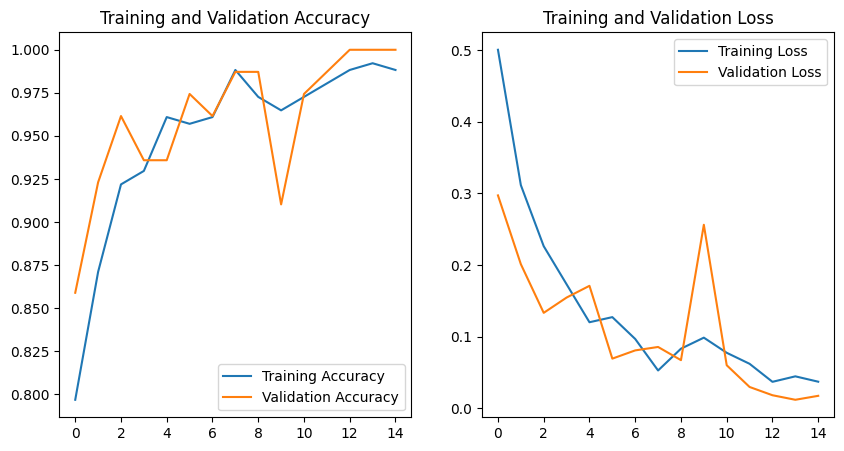

In [ ]:
# import os
# import tensorflow as tf
# # from tensorflow.keras.applications import MobileNetV3Small, MobileNetV3Large
# # from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
# from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
# # from tensorflow.keras.applications import InceptionV3
# # from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
# # from tensorflow.keras.applications import ResNet50
# # from tensorflow.keras.applications import DenseNet121

# # from tensorflow.keras.applications import MobileNet, MobileNetV2, preprocess_input
# # from tensorflow.keras.applications.mobilenet_v import MobileNetV, preprocess_input
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense


import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np


# Define image dimensions

image_path = '/content/drive/MyDrive/All_Images/CG/image_1.jpg'
image = cv2.imread(image_path)
img_height, img_width = image.shape[:2]

print(f"Image width: {img_width} pixels")
print(f"Image height: {img_height} pixels")

img_height, img_width = image.shape[:2]

directory = '/content/drive/MyDrive/All_Images_Original'
classes = [file for file in os.listdir(directory) if not file.endswith('.ipynb_checkpoints')]

# Load and preprocess the data
ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=32,
)

#resize and rescale the value
# resize_and_rescale = tf.keras.Sequential([
#     tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
#     tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
# ])

# ds  = tf.keras.utils.image_dataset_from_directory(
#     directory,
#     labels='inferred',
#     label_mode='categorical',
#     class_names=['CG','DM'],
#     color_mode='rgb',
#     batch_size=32,
#     image_size=(img_height, img_width),
#     shuffle=True,
#     seed=None,
#     validation_split=None,
#     subset=None,
#     interpolation='bilinear',
#     follow_links=False,
#     crop_to_aspect_ratio=False,
# )


# Splitting the training set
train_size = int(0.8 * len(ds))
train_ds = ds.take(train_size)
test_ds = ds.skip(train_size)

# Create the base MobileNetV2 model
input_shape = (img_height, img_width , 3)
base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
# base_model = InceptionV3(input_shape=input_shape, include_top=False, weights='imagenet')
base_model.trainable = False

# Create the binary classification model
inputs = tf.keras.Input(shape=input_shape)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.1)(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
loss_function = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
metrics = ['accuracy',tf.metrics.Recall(), tf.metrics.Precision(),tf.metrics.AUC()]
# metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

# Train the model
total_epochs = 15
history = model.fit(train_ds, epochs=total_epochs, validation_data=test_ds)

# Evaluate the model
# model.evaluate(test_ds)
model.build(input_shape)
model.summary()


acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(total_epochs)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


Classification of the severity of DM patients by plantar thermogram images





In [ ]:

import os
DM = []

Class_1 = '/content/drive/MyDrive/DM_Severity_Classification/Class_1'
Class_2 = '/content/drive/MyDrive/DM_Severity_Classification/Class_2'
Class_3 = '/content/drive/MyDrive/DM_Severity_Classification/Class_3'
Class_4 = '/content/drive/MyDrive/DM_Severity_Classification/Class_4'
Class_5 = '/content/drive/MyDrive/DM_Severity_Classification/Class_5'
Class_6 = '/content/drive/MyDrive/DM_Severity_Classification/Class_6'

# Extracting the names
Class_1_ = os.listdir(Class_1)
Class_2_ = os.listdir(Class_2)
Class_3_ = os.listdir(Class_3)
Class_4_ = os.listdir(Class_4)
Class_5_ = os.listdir(Class_5)
Class_6_ = os.listdir(Class_6)

# Filtering images
DM_1 = [imgfile for imgfile in Class_1_ if imgfile.endswith('.png')]
DM_2 = [imgfile for imgfile in Class_2_ if imgfile.endswith('.png')]
DM_3 = [imgfile for imgfile in Class_3_ if imgfile.endswith('.png')]
DM_4 = [imgfile for imgfile in Class_4_ if imgfile.endswith('.png')]
DM_5 = [imgfile for imgfile in Class_5_ if imgfile.endswith('.png')]
DM_6 = [imgfile for imgfile in Class_6_ if imgfile.endswith('.png')]

print(len(DM_1))
print(len(DM_2))
print(len(DM_3))
print(len(DM_4))
print(len(DM_5))
print(len(DM_6))

# # Calculate and print the total count
# total_count = len(DM_1) + len(DM_2) + len(DM_3) + len(DM_4) + len(DM_5) + len(DM_6)
#augmented database




30
30
35
32
36
90


Importing the images via keras library

In [ ]:
directory = '/content/drive/MyDrive/DM_Severity_Classification'
classes = [file for file in os.listdir(directory) if not  file.endswith('.ipynb_checkpoints') ]
print(classes)

image_path = '/content/drive/MyDrive/DM_Severity_Classification/Class_1/DM002_M_L.png'
image = cv2.imread(image_path)
img_height, img_width = image.shape[:2]

print(f"Image width: {img_width} pixels")
print(f"Image height: {img_height} pixels")

directory = '/content/drive/MyDrive/All_Images'
# ds = tf.keras.preprocessing.image_dataset_from_directory(
#     directory,
#     shuffle=True,
#     image_size=(img_height, img_width),
#     batch_size=32,
# )

directory = '/content/drive/MyDrive/All_Images_Original' # The problem is witth you images
ds  = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    class_names=['CG','DM'],
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

print(len(ds))
print(ds.class_names)


['Class_4', 'Class_6', 'Class_2', 'Class_5', 'Class_1', 'Class_3']
Image width: 55 pixels
Image height: 128 pixels
Found 3600 files belonging to 2 classes.
113
['CG', 'DM']


Info

In [ ]:

# Splitting the training set
train_size = int(0.8 * len(ds))
train_ds = ds.take(train_size)
test_ds = ds.skip(train_size)

#autotuning
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

#reszizing and rescale the value
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3)
])







CNN network model creation with the same custom model as used earlier

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

channels = 3
batch_size=32

input_shape = (batch_size, img_height, img_width, channels )

#create the CNN model

model = Sequential()
model.add(resize_and_rescale)
model.add(Conv2D(32,kernel_size=(3,3),padding='same', activation='relu',input_shape=input_shape))
model.add(Conv2D(64,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())

model.add(Dropout(0.10))
model.add(Dense(2))

loss_function = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
metrics = ['accuracy',tf.metrics.Recall(), tf.metrics.Precision(),tf.metrics.AUC()]
model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

model.build(input_shape)
model.summary()

epochs = 15

history = model.fit(train_ds, epochs=epochs, validation_data=test_ds)

epochs_range = range(epochs)

acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')



Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_26 (Sequential)  (32, 128, 55, 3)          0         
                                                                 
 conv2d_130 (Conv2D)         (32, 128, 55, 32)         896       
                                                                 
 conv2d_131 (Conv2D)         (32, 128, 55, 64)         18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (32, 64, 27, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_132 (Conv2D)         (32, 64, 27, 64)          36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (32, 32, 13, 64)         0         
 g2D)                                                

InvalidArgumentError: ignored

In [ ]:
#Data Augmentation pipeline
import os
import cv2
import time
import tensorflow as tf
import random
DM = []

Class_1 = '/content/drive/MyDrive/DM_Severity_Classification/Class_1'
Class_2 = '/content/drive/MyDrive/DM_Severity_Classification/Class_2'
Class_3 = '/content/drive/MyDrive/DM_Severity_Classification/Class_3'
Class_4 = '/content/drive/MyDrive/DM_Severity_Classification/Class_4'
Class_5 = '/content/drive/MyDrive/DM_Severity_Classification/Class_5'
Class_6 = '/content/drive/MyDrive/DM_Severity_Classification/Class_6'

# Extracting the names
Class_1_ = os.listdir(Class_1)
Class_2_ = os.listdir(Class_2)
Class_3_ = os.listdir(Class_3)
Class_4_ = os.listdir(Class_4)
Class_5_ = os.listdir(Class_5)
Class_6_ = os.listdir(Class_6)

# Filtering images
DM_1 = [imgfile for imgfile in Class_1_ if imgfile.endswith('.png')]
DM_2 = [imgfile for imgfile in Class_2_ if imgfile.endswith('.png')]
DM_3 = [imgfile for imgfile in Class_3_ if imgfile.endswith('.png')]
DM_4 = [imgfile for imgfile in Class_4_ if imgfile.endswith('.png')]
DM_4 = DM_4[0:30]
DM_5 = [imgfile for imgfile in Class_5_ if imgfile.endswith('.png')]
DM_5 = DM_5[0:35]
DM_6 = [imgfile for imgfile in Class_6_ if imgfile.endswith('.png')]

print(len(DM_1))
print(len(DM_2))
print(len(DM_3))
print(len(DM_4))
print(len(DM_5))
print(len(DM_6))

directory = '/content/drive/MyDrive/DM_Severity_Classification'
classes = [file for file in os.listdir(directory) if not  file.endswith('.ipynb_checkpoints') ]
print(classes)

image_path = '/content/drive/MyDrive/DM_Severity_Classification/Class_1/DM002_M_L.png'
image = cv2.imread(image_path)
img_height, img_width = image.shape[:2]

print(f"Image width: {img_width} pixels")
print(f"Image height: {img_height} pixels")

#21
#21
#18






30
30
35
30
35
90
['Class_4', 'Class_6', 'Class_2', 'Class_5', 'Class_1', 'Class_3']
Image width: 55 pixels
Image height: 128 pixels


Data Augmentation pipeline

In [ ]:


image_count = 0
CLASS_1 = []
CLASS_2 = []
CLASS_3 = []
CLASS_4 = []
CLASS_5 = []
CLASS_6 = []
CLASS_1_AUGMENTED = []
CLASS_2_AUGMENTED = []
CLASS_3_AUGMENTED = []
CLASS_4_AUGMENTED = []
CLASS_5_AUGMENTED = []
CLASS_6_AUGMENTED = []


for file in DM_1:
    png_file_path = os.path.join(Class_1 , file)
    image = Image.open(png_file_path)
    image = image.convert('RGB')
    image_array = np.array(image)
    CLASS_1.append(image_array)

for file in DM_2:
    png_file_path = os.path.join(Class_2 , file)
    image = image.convert('RGB')
    image_array = np.array(image)
    CLASS_2.append(image_array)

for file in DM_3:
    png_file_path = os.path.join(Class_3 , file)
    image = image.convert('RGB')
    image_array = np.array(image)
    CLASS_3.append(image_array)

for file in DM_4:
    png_file_path = os.path.join(Class_4 , file)
    image = image.convert('RGB')
    image_array = np.array(image)
    CLASS_4.append(image_array)

for file in DM_5:
    png_file_path = os.path.join(Class_5 , file)
    image = image.convert('RGB')
    image_array = np.array(image)
    CLASS_5.append(image_array)

for file in DM_6:
    png_file_path = os.path.join(Class_6 , file)
    image = image.convert('RGB')
    image_array = np.array(image)
    CLASS_6.append(image_array)


#data augmentation
def flip(image)->np.ndarray:
  seq = iaa.Sequential([iaa.Fliplr(0.7)])                                      # Horizontal flip with a 50% chance
  augmented_image = seq(image=image)
  return  augmented_image

def Affine(image)->np.ndarray:
  seq = iaa.Sequential([iaa.Affine(rotate=(random.randint(-20,20), random.randint(-20,20)))])                         # Rotate image by -20 to 20 degrees
  augmented_image = seq(image=image)
  return  augmented_image

def Gaussian_Blur(image)->np.ndarray:
  seq = iaa.Sequential([iaa.GaussianBlur(sigma=(0, random.randint(0,3)))])                     # Apply Gaussian Blur
  augmented_image = seq(image=image)
  return  augmented_image

def Gaussian_Noise(image)->np.ndarray:
  seq = iaa.Sequential([iaa.AdditiveGaussianNoise(scale=(0, random.randint(0,5)*(255/100)))])       # Apply Gaussian Blur
  augmented_image = seq(image=image)
  return  augmented_image

def Brightness(image)->np.ndarray:
  seq = iaa.Sequential([iaa.Multiply((random.random(), random.random()+1))])                             # Apply Gaussian Blur
  augmented_image = seq(image=image)
  return  augmented_image

def Contrast_Normalization(image)->np.ndarray:
  seq = iaa.Sequential([iaa.ContrastNormalization((random.random(),random.random()+1))])                # Apply Gaussian Blur
  augmented_image = seq(image=image)
  return  augmented_image

def Affine_Scale(image)->np.ndarray:
  seq = iaa.Sequential([iaa.Affine(scale=(random.random(),random.random()+1))])                         # Apply affine
  augmented_image = seq(image=image)
  return  augmented_image

def Affine_Shear(image)->np.ndarray:
  seq = iaa.Sequential([iaa.PerspectiveTransform(scale=(random.random()/100, random.random()))])                         # Apply affine
  augmented_image = seq(image=image)
  return  augmented_image

def Perspective_Transform(image)->np.ndarray:
  seq = iaa.Sequential([iaa.Affine(shear=(random.random(), random.random()+1))])                         # Apply affine
  augmented_image = seq(image=image)
  return  augmented_image


def  Most_Noise(image)->np.ndarray:
  seq = augmentation_pipeline_all = iaa.Sequential([
  iaa.Fliplr(0.5),        # Horizontal flip with a 50% chance
  iaa.Affine(rotate=(random.randint(-20,20), random.randint(-20,20))),  # Rotate image by -20 to 20 degrees
  iaa.GaussianBlur(sigma=(0, random.randint(0,3))),  # Apply Gaussian blur
  iaa.AdditiveGaussianNoise(scale=(0, random.randint(0,5)*(255/100)))  # Add Gaussian noise
                                                ])                              # Apply affine
  augmented_image = seq(image=image)
  return  augmented_image

def  Random_Noise(image,number)->np.ndarray:
  random_noise = [iaa.Fliplr(0.5),iaa.Affine(rotate=(-20, 20)),iaa.GaussianBlur(sigma=(0, 3.0)),iaa.AdditiveGaussianNoise(scale=(0, 0.05*255))]
  seq = augmentation_pipeline_all = iaa.Sequential([
  iaa.Fliplr(0.9),        # Horizontal flip with a 50% chance
  iaa.Affine(rotate=(-20, 20)),  # Rotate image by -20 to 20 degrees
  iaa.GaussianBlur(sigma=(0, 3.0)),  # Apply Gaussian blur
  iaa.AdditiveGaussianNoise(scale=(0, 0.05*255))  # Add Gaussian noise
                                                ])                              # Apply affine
  augmented_image = seq(image=image)
  return  augmented_image



operations = {
    "flip": flip ,
    "affine Scale": Affine_Scale,
    "gaussian blur": Gaussian_Blur,
    "brightness":Brightness,
    "gaussian additive noise":Gaussian_Noise,
    "contrast normalization":Contrast_Normalization,
    "affine scale":  Affine_Scale,
    "affine shear": Affine_Shear,
    "persceptive transform":Perspective_Transform,
    "most noise":Most_Noise
}



def saving_the_image(augmented_image,output_directory):
  global image_count
  image_count = image_count+1
  file_name = f'image_{image_count}.jpg'
  output_file_path = os.path.join(output_directory, file_name)
  # with open(output_file_path, 'wb') as image_augmented:
  # im1 = Image.open(r"C:\Users\System-Pc\Desktop\flower1.jpg")
  i = Image.fromarray(augmented_image)
  i.save(output_file_path)
  time.sleep(0.1)


def Augmnentation_pipeline(operation,cg_array, store_array)->np.ndarray:
    if operation in operations :
      operation_function = operations[operation]
      for cg_image in cg_array:
        operation_function = operations[random.choice(list(operations.keys()))]
        augmented_image = operation_function(image=cg_image)
        store_array.append(augmented_image)
        saving_the_image(augmented_image,output_directory)
        # saving_the_image(output_directory,augmented_image)
    elif operation == "multi":
      for cg_image in cg_array:
        operation_function = operations[random.choice(list(operations.keys()))]
        augmented_image = operation_function(image=cg_image)
        augmented_image_ = operations[random.choice(list(operations.keys()))](image=augmented_image)
        store_array.append(augmented_image_)
        saving_the_image(augmented_image_,output_directory)
        # saving_the_image(output_directory,augmented_image)
      return store_array

def pass_pipeline(cg_array, store_array)->np.ndarray:
  for cg_image in cg_array:
    store_array.append(cg_image)
    saving_the_image(cg_image,output_directory)
  return store_array
# output_directory = '/content/drive/MyDrive/DM_Severity_Classification_augmented/Class_1' #630 #21 #900 #1200

# Augmnentation_pipeline("flip",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("affine Scale",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("gaussian blur",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("brightness",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("gaussian additive noise",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("contrast normalization",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("affine Scale",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("affine shear",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("most noise",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("persceptive transform",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# #9
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# #10
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# #originial
# pass_pipeline(CLASS_1, CLASS_1_AUGMENTED)

# output_directory = '/content/drive/MyDrive/DM_Severity_Classification_augmented/Class_2' #630 #21 #900 #1200

# Augmnentation_pipeline("flip",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("affine Scale",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("gaussian blur",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("brightness",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("gaussian additive noise",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("contrast normalization",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("affine Scale",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("affine shear",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("most noise",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("persceptive transform",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# #9
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# #10
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# #original
# pass_pipeline(CLASS_2,CLASS_2_AUGMENTED)


# output_directory = '/content/drive/MyDrive/DM_Severity_Classification_augmented/Class_3' #630 #18 #26 #1190

# Augmnentation_pipeline("flip",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("affine Scale",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("gaussian blur",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("brightness",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("gaussian additive noise",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("contrast normalization",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("affine Scale",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("affine shear",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("most noise",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("persceptive transform",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# #8
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# #8
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# #original
# pass_pipeline(CLASS_3,CLASS_3_AUGMENTED)

# output_directory = '/content/drive/MyDrive/DM_Severity_Classification_augmented/Class_4' #630 #21 #900 #1200

# Augmnentation_pipeline("flip",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("affine Scale",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("gaussian blur",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("brightness",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("gaussian additive noise",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("contrast normalization",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("affine Scale",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("affine shear",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("most noise",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("persceptive transform",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# #9
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# #10
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# #original
# pass_pipeline(CLASS_4, CLASS_4_AUGMENTED)

# output_directory = '/content/drive/MyDrive/DM_Severity_Classification_augmented/Class_5' #630 #18 #26 #1190

# Augmnentation_pipeline("flip",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("affine Scale",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("gaussian blur",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("brightness",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("gaussian additive noise",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("contrast normalization",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("affine Scale",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("affine shear",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("most noise",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("persceptive transform",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# #8
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# #8
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# #oroginal
# pass_pipeline(CLASS_5,CLASS_5_AUGMENTED)

# output_directory = '/content/drive/MyDrive/DM_Severity_Classification_augmented/Class_6'   #630 #7 #900 #1230

# Augmnentation_pipeline("flip",CLASS_6,CLASS_6_AUGMENTED)
# Augmnentation_pipeline("affine Scale",CLASS_6,CLASS_6_AUGMENTED)
# Augmnentation_pipeline("gaussian blur",CLASS_6,CLASS_6_AUGMENTED)
# Augmnentation_pipeline("brightness",CLASS_6,CLASS_6_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_6,CLASS_6_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_6,CLASS_6_AUGMENTED)
# #3
# Augmnentation_pipeline("brightness",CLASS_6,CLASS_6_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_6,CLASS_6_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_6,CLASS_6_AUGMENTED)
# #3
# Augmnentation_pipeline("multi",CLASS_6,CLASS_6_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_6,CLASS_6_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_6,CLASS_6_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_6,CLASS_6_AUGMENTED)
# #original
# pass_pipeline(CLASS_6,CLASS_6_AUGMENTED)



Data load to Keras

In [ ]:
output_directory_1 = '/content/drive/MyDrive/DM_Severity_Classification_augmented/Class_1'
output_directory_2 = '/content/drive/MyDrive/DM_Severity_Classification_augmented/Class_2'
output_directory_3 = '/content/drive/MyDrive/DM_Severity_Classification_augmented/Class_3'
output_directory_4 = '/content/drive/MyDrive/DM_Severity_Classification_augmented/Class_4'
output_directory_5 = '/content/drive/MyDrive/DM_Severity_Classification_augmented/Class_5'
output_directory_6 = '/content/drive/MyDrive/DM_Severity_Classification_augmented/Class_6'
C1 = os.listdir(output_directory_1)
C2 = os.listdir(output_directory_2)
C3 = os.listdir(output_directory_3)
C4 = os.listdir(output_directory_4)
C5 = os.listdir(output_directory_5)
C6 = os.listdir(output_directory_6)
print(len(C1))
print(len(C2))
print(len(C3))
print(len(C4))
print(len(C5))
print(len(C6))
# output_directory = '/content/drive/MyDrive/DM_Severity_Classification_augmented/Class_2'
# C = os.listdir(output_directory)
# print(len(C))


1200
1200
1190
1200
1190
1260


Fine tuning with hyperparamters

In [ ]:

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.applications import MobileNetV3Small, MobileNetV3Large
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.applications.ResNet50 import preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.utils import to_categorical
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
import tensorflow as tf




directory = '/content/drive/MyDrive/DM_Severity_Classification_augmented'
ds  = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    class_names=['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6'],
    color_mode='rgb',
    batch_size=16,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

print(len(ds))
print(ds.class_names)

#reszizing and rescale the value
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3)
])



# Splitting the training set
train_size = int(0.8 * len(ds))
train_ds = ds.take(train_size)
test_ds = ds.skip(train_size)

#autotuning
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

input_shape = (32, img_height, img_width, 3)
model = Sequential()
model.add(resize_and_rescale)
model.add(Conv2D(16,kernel_size=(9,9),padding='same', activation='relu',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(9,9),padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,kernel_size=(9,9),padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.20))
model.add(Flatten())
# model.add(Dropout(0.10))
model.add(Dense(128,activation='relu'))
model.add(Dense(6))

# # # Create the base MobileNetV2 model
# input_shape = (img_height,img_width, 3)
# # base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
# # base_model = ResNet50(input_shape=input_shape, include_top=False, weights='imagenet')
# base_model = VGG16(input_shape=input_shape, include_top=False, weights='imagenet')
# # base_model = VGG19(input_shape=input_shape, include_top=False, weights='imagenet')
# # base_model = InceptionV3(input_shape=input_shape, include_top=False, weights='imagenet')
# base_model.trainable = False

# # Create the binary classification model
# inputs = tf.keras.Input(shape=input_shape)
# x = preprocess_input(inputs)
# x = base_model(x, training=False)
# x = GlobalAveragePooling2D()(x)
# # x = Dropout(0.1)(x)
# outputs = Dense(6)(x)
# model = tf.keras.Model(inputs, outputs)


loss_function = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# metrics = ['accuracy']
metrics = ['accuracy',tf.metrics.Recall(), tf.metrics.Precision(),tf.metrics.AUC()]
model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

model.build(input_shape)
model.summary()

epochs = 5

history = model.fit(train_ds, epochs=epochs, validation_data=test_ds)

epochs_range = range(epochs)

acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')










NameError: ignored

Ensemble methods. use of boosting to check the improvement

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
import numpy as np

X_train = []
y_train = []

X_test = []
y_test = []

img_height = 168
img_width = 65

directory = '/content/drive/MyDrive/DM_Severity_Classification_augmented'
ds  = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    class_names=['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6'],
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

# ds = tf.keras.preprocessing.image_dataset_from_directory(
#     directory,
#     shuffle=True,
#     image_size=(img_height, img_width),
#     batch_size=32,
# )


# Splitting the training set
train_size = int(0.8 * len(ds))
train_ds = ds.take(train_size)
test_ds = ds.skip(train_size)


# AUTOTUNE = tf.data.experimental.AUTOTUNE
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# test_ds  = test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# nsamples, nx, ny = train_ds.shape
# train_ds = train_ds.reshape((nsamples,nx*ny))

# Iterate through the training dataset and append data and labels
for data, labels in train_ds:
    X_train.append(data.numpy())
    y_train.append(np.argmax(labels.numpy(), axis=1))  # Convert one-hot encoded labels to class labels

# Iterate through the test dataset and append data and labels
for data, labels in test_ds:
    X_test.append(data.numpy())
    y_test.append(np.argmax(labels.numpy(), axis=1))  # Convert one-hot encoded labels to class labels

# Convert lists to NumPy arrays
X_train = np.vstack(X_train)
y_train = np.hstack(y_train)

X_test = np.vstack(X_test)
y_test = np.hstack(y_test)

# Define the weak learner (base model)
base_model = DecisionTreeClassifier(max_depth=1)  # You can adjust max_depth as needed

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(
    base_estimator=base_model,
    n_estimators=50,      # Number of weak learners (adjust as needed)
    learning_rate=0.01,     # Learning rate (adjust as needed)
)

y_train_encoded = to_categorical(y_train, num_classes=6)
y_test_encoded = to_categorical(y_test, num_classes=6)

# Train the AdaBoost classifier
X_train, y_train = next(iter(train_ds))  # Assuming your train_ds is a TensorFlow dataset
X_test, y_test = next(iter(test_ds))  # Assuming your test_ds is a TensorFlow dataset

X_train = preprocess_input(X_train)  # Preprocess the input data if required
X_test = preprocess_input(X_test)

print(y_train_encoded.shape)

adaboost_classifier.fit(X_train, y_train_encoded)

# Make predictions
y_pred_encoded = adaboost_classifier.predict(X_test)
y_pred = np.argmax(y_pred_encoded, axis=1)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Found 7240 files belonging to 6 classes.


TypeError: ignored

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import numpy as np

X_train = []
y_train = []

X_test = []
y_test = []

img_height = 168
img_width = 65

directory = '/content/drive/MyDrive/DM_Severity_Classification_augmented'
ds  = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    class_names=['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6'],
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

# Splitting the training set
train_size = int(0.8 * len(ds))
train_ds = ds.take(train_size)
test_ds = ds.skip(train_size)

# Initialize empty lists to store data and labels
X_train = []
y_train = []

X_test = []
y_test = []

# Iterate through the training dataset and append data and labels
for data, labels in train_ds:
    X_train.append(data.numpy())
    y_train.append(np.argmax(labels.numpy(), axis=1))  # Convert one-hot encoded labels to class labels

# Iterate through the test dataset and append data and labels
for data, labels in test_ds:
    X_test.append(data.numpy())
    y_test.append(np.argmax(labels.numpy(), axis=1))  # Convert one-hot encoded labels to class labels

# Convert lists to NumPy arrays
X_train = np.vstack(X_train)
y_train = np.hstack(y_train)

X_test = np.vstack(X_test)
y_test = np.hstack(y_test)

# Preprocess input data (rescaling)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape each image in X_train and X_test to a 1D array
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Define the weak learner (base model)
base_model = DecisionTreeClassifier(max_depth=1)  # You can adjust max_depth as needed

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(
    base_estimator=base_model,
    n_estimators=100,      # Number of weak learners (adjust as needed)
    learning_rate=0.1,    # Learning rate (adjust as needed)
)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train_flat, y_train)

# Make predictions
y_pred = adaboost_classifier.predict(X_test_flat)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Found 7240 files belonging to 6 classes.


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.32


In [ ]:
pip install keras_applications

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.4 MB/s eta 0:00:00


Testing the images on a new DM set
6 classes -> 5 classes
Custom CNN

['Class_2', 'Class_1', 'Class_3', 'Class_4', 'Class_5']
Found 253 files belonging to 5 classes.
this is one bacth shape (32, 168, 65, 3)
this is label shape  (32, 5)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 168, 65, 3)]      0         
                                                                 
 tf.__operators__.getitem_1   (None, 168, 65, 3)       0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 168, 65, 3)       0         
 a)                                                              
                                                                 
 resnet50 (Functional)       (None, 6, 3, 2048)        23587712  
                                                                 
 global_average_pooling2d (

Text(0.5, 1.0, 'Training and Validation Loss')

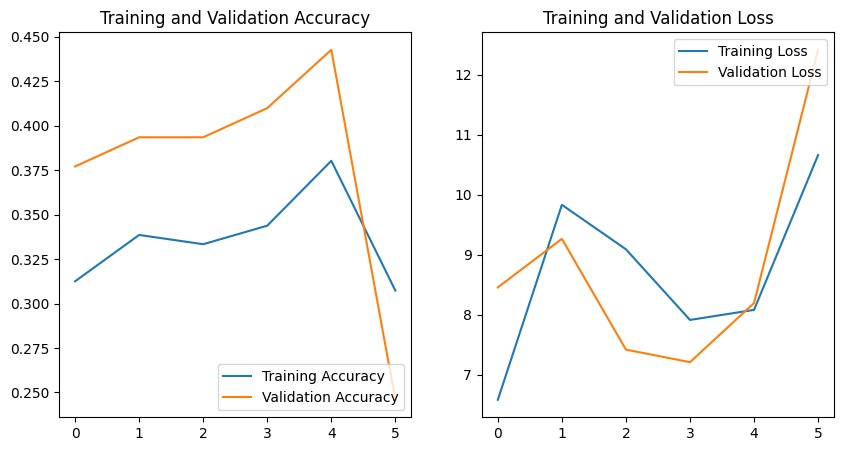

In [ ]:

import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
# from tensorflow.keras.applications import InceptionV3
from keras.applications.resnet import preprocess_input
from keras.applications.resnet import ResNet50
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


img_height = 168
img_width = 65

channels = 3
batch_size=32

input_shape = (img_height, img_width, channels)


#Acquire the images from All__Images directory then input into Keras Libraray

def is_valid_file(filename):
    return not filename.endswith('.ipynb_checkpoints')



directory = '/content/drive/MyDrive/DM_Sevreity_Classification_new'
classes = [file for file in os.listdir(directory) if not  file.endswith('.ipynb_checkpoints') ]
print(classes)


ds  = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    class_names=['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5'],
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#splitting the training set
train_size = int(0.8 * len(ds))
train_ds = ds.take(train_size)
test_ds = ds.skip(train_size)

#fitering out the DM and CG fies
# print(ds.class_names)
# print(test_ds)
# n_class = len(ds.class_names)

#convert simple form
# fetch 1 batch and 1 batch have 32 files
for image_batch, lable_batch in test_ds.take(1):
  print('this is one bacth shape',image_batch.shape)
  print('this is label shape ',lable_batch.shape)


# for image_batch, lable_batch in test_ds.take(1):
#   print(image_batch.numpy())
#   print('\n')
#   print(lable_batch.numpy())

#increase the performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

#resize and rescale the value
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])


#data augmentation has already been done

#Craeting the model

# input_shape = (32, img_height, img_width, 3)
# model = Sequential()
# model.add(resize_and_rescale)
# model.add(Conv2D(32,kernel_size=(3,3),padding='same', activation='relu',input_shape=input_shape))
# model.add(Conv2D(64,kernel_size=(3,3),padding='same', activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Conv2D(64,kernel_size=(3,3),padding='same', activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Flatten())
# model.add(Dense(32,activation='relu'))
# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.10))
# model.add(Dense(5))

base_model = ResNet50(input_shape=input_shape, include_top=False, weights='imagenet')
base_model.trainable = False

# Create the binary classification model
inputs = tf.keras.Input(shape=input_shape)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.1)(x)
outputs = Dense(5)(x)
model = tf.keras.Model(inputs, outputs)

# model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
loss_function = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# metrics = ['accuracy']
metrics = ['accuracy',tf.metrics.Recall(), tf.metrics.Precision(),tf.metrics.AUC()]
model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)
model.build(input_shape)
model.summary()

epochs = 6

history = model.fit(
    train_ds,
    validation_data = test_ds,
    epochs = epochs
)


acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')









# # Usage
# data_df = ALL_DATA
# img_height = 168
# img_width = 65
# n_classes = 2  # Replace with the actual number of classes
# batch_size = 32
# epochs = 10

# model, history = train_custom_model(data_df, img_height, img_width, n_classes, batch_size, epochs)


Calculating the amount of files in the directory

In [ ]:
output_directory_1 = '/content/drive/MyDrive/DM_Sevreity_Classification_new/Class_1'
output_directory_2 = '/content/drive/MyDrive/DM_Sevreity_Classification_new/Class_2'
output_directory_3 = '/content/drive/MyDrive/DM_Sevreity_Classification_new/Class_3'
output_directory_4 = '/content/drive/MyDrive/DM_Sevreity_Classification_new/Class_4'
output_directory_5 = '/content/drive/MyDrive/DM_Sevreity_Classification_new/Class_5'
C1 = os.listdir(output_directory_1)
C2 = os.listdir(output_directory_2)
C3 = os.listdir(output_directory_3)
C4 = os.listdir(output_directory_4)
C5 = os.listdir(output_directory_5)
print(len(C1))
print(len(C2))
print(len(C3))
print(len(C4))
print(len(C5))

60
35
32
36
90


Data Augmentation

In [ ]:
#Data Augmentation pipeline
import os
import cv2
import time
import tensorflow as tf
import random
DM = []

Class_1 = '/content/drive/MyDrive/DM_Sevreity_Classification_new/Class_1'
Class_2 = '/content/drive/MyDrive/DM_Sevreity_Classification_new/Class_2'
Class_3 = '/content/drive/MyDrive/DM_Sevreity_Classification_new/Class_3'
Class_4 = '/content/drive/MyDrive/DM_Sevreity_Classification_new/Class_4'
Class_5 = '/content/drive/MyDrive/DM_Sevreity_Classification_new/Class_5'


# Extracting the names
Class_1_ = os.listdir(Class_1)
Class_2_ = os.listdir(Class_2)
Class_3_ = os.listdir(Class_3)
Class_4_ = os.listdir(Class_4)
Class_5_ = os.listdir(Class_5)


# Filtering images
DM_1 = [imgfile for imgfile in Class_1_ if imgfile.endswith('.png')]
DM_2 = [imgfile for imgfile in Class_2_ if imgfile.endswith('.png')]
DM_3 = [imgfile for imgfile in Class_3_ if imgfile.endswith('.png')]
DM_3 = DM_3[0:30]
DM_4 = [imgfile for imgfile in Class_4_ if imgfile.endswith('.png')]
DM_4 = DM_4[0:35]
DM_5 = [imgfile for imgfile in Class_5_ if imgfile.endswith('.png')]

print(len(DM_1))
print(len(DM_2))
print(len(DM_3))
print(len(DM_4))
print(len(DM_5))


directory = '/content/drive/MyDrive/DM_Severity_Classification'
classes = [file for file in os.listdir(directory) if not  file.endswith('.ipynb_checkpoints') ]
print(classes)

image_path = '/content/drive/MyDrive/DM_Severity_Classification/Class_1/DM002_M_L.png'
image = cv2.imread(image_path)
img_height, img_width = image.shape[:2]

print(f"Image width: {img_width} pixels")
print(f"Image height: {img_height} pixels")

#21
#21
#18






60
35
30
35
90
['Class_4', 'Class_6', 'Class_2', 'Class_5', 'Class_1', 'Class_3']
Image width: 55 pixels
Image height: 128 pixels


Data Augmentation

In [ ]:


image_count = 0
CLASS_1 = []
CLASS_2 = []
CLASS_3 = []
CLASS_4 = []
CLASS_5 = []
# CLASS_6 = []
CLASS_1_AUGMENTED = []
CLASS_2_AUGMENTED = []
CLASS_3_AUGMENTED = []
CLASS_4_AUGMENTED = []
CLASS_5_AUGMENTED = []
# CLASS_6_AUGMENTED = []


for file in DM_1:
    png_file_path = os.path.join(Class_1 , file)
    image = Image.open(png_file_path)
    image = image.convert('RGB')
    image_array = np.array(image)
    CLASS_1.append(image_array)

for file in DM_2:
    png_file_path = os.path.join(Class_2 , file)
    image = image.convert('RGB')
    image_array = np.array(image)
    CLASS_2.append(image_array)

for file in DM_3:
    png_file_path = os.path.join(Class_3 , file)
    image = image.convert('RGB')
    image_array = np.array(image)
    CLASS_3.append(image_array)

for file in DM_4:
    png_file_path = os.path.join(Class_4 , file)
    image = image.convert('RGB')
    image_array = np.array(image)
    CLASS_4.append(image_array)

for file in DM_5:
    png_file_path = os.path.join(Class_5 , file)
    image = image.convert('RGB')
    image_array = np.array(image)
    CLASS_5.append(image_array)

# for file in DM_6:
#     png_file_path = os.path.join(Class_6 , file)
#     image = image.convert('RGB')
#     image_array = np.array(image)
#     CLASS_6.append(image_array)


#data augmentation
def flip(image)->np.ndarray:
  seq = iaa.Sequential([iaa.Fliplr(0.7)])                                      # Horizontal flip with a 50% chance
  augmented_image = seq(image=image)
  return  augmented_image

def Affine(image)->np.ndarray:
  seq = iaa.Sequential([iaa.Affine(rotate=(random.randint(-20,20), random.randint(-20,20)))])                         # Rotate image by -20 to 20 degrees
  augmented_image = seq(image=image)
  return  augmented_image

def Gaussian_Blur(image)->np.ndarray:
  seq = iaa.Sequential([iaa.GaussianBlur(sigma=(0, random.randint(0,3)))])                     # Apply Gaussian Blur
  augmented_image = seq(image=image)
  return  augmented_image

def Gaussian_Noise(image)->np.ndarray:
  seq = iaa.Sequential([iaa.AdditiveGaussianNoise(scale=(0, random.randint(0,5)*(255/100)))])       # Apply Gaussian Blur
  augmented_image = seq(image=image)
  return  augmented_image

def Brightness(image)->np.ndarray:
  seq = iaa.Sequential([iaa.Multiply((random.random(), random.random()+1))])                             # Apply Gaussian Blur
  augmented_image = seq(image=image)
  return  augmented_image

def Contrast_Normalization(image)->np.ndarray:
  seq = iaa.Sequential([iaa.ContrastNormalization((random.random(),random.random()+1))])                # Apply Gaussian Blur
  augmented_image = seq(image=image)
  return  augmented_image

def Affine_Scale(image)->np.ndarray:
  seq = iaa.Sequential([iaa.Affine(scale=(random.random(),random.random()+1))])                         # Apply affine
  augmented_image = seq(image=image)
  return  augmented_image

def Affine_Shear(image)->np.ndarray:
  seq = iaa.Sequential([iaa.PerspectiveTransform(scale=(random.random()/100, random.random()))])                         # Apply affine
  augmented_image = seq(image=image)
  return  augmented_image

def Perspective_Transform(image)->np.ndarray:
  seq = iaa.Sequential([iaa.Affine(shear=(random.random(), random.random()+1))])                         # Apply affine
  augmented_image = seq(image=image)
  return  augmented_image


def  Most_Noise(image)->np.ndarray:
  seq = augmentation_pipeline_all = iaa.Sequential([
  iaa.Fliplr(0.5),        # Horizontal flip with a 50% chance
  iaa.Affine(rotate=(random.randint(-20,20), random.randint(-20,20))),  # Rotate image by -20 to 20 degrees
  iaa.GaussianBlur(sigma=(0, random.randint(0,3))),  # Apply Gaussian blur
  iaa.AdditiveGaussianNoise(scale=(0, random.randint(0,5)*(255/100)))  # Add Gaussian noise
                                                ])                              # Apply affine
  augmented_image = seq(image=image)
  return  augmented_image

def  Random_Noise(image,number)->np.ndarray:
  random_noise = [iaa.Fliplr(0.5),iaa.Affine(rotate=(-20, 20)),iaa.GaussianBlur(sigma=(0, 3.0)),iaa.AdditiveGaussianNoise(scale=(0, 0.05*255))]
  seq = augmentation_pipeline_all = iaa.Sequential([
  iaa.Fliplr(0.9),        # Horizontal flip with a 50% chance
  iaa.Affine(rotate=(-20, 20)),  # Rotate image by -20 to 20 degrees
  iaa.GaussianBlur(sigma=(0, 3.0)),  # Apply Gaussian blur
  iaa.AdditiveGaussianNoise(scale=(0, 0.05*255))  # Add Gaussian noise
                                                ])                              # Apply affine
  augmented_image = seq(image=image)
  return  augmented_image



operations = {
    "flip": flip ,
    "affine Scale": Affine_Scale,
    "gaussian blur": Gaussian_Blur,
    "brightness":Brightness,
    "gaussian additive noise":Gaussian_Noise,
    "contrast normalization":Contrast_Normalization,
    "affine scale":  Affine_Scale,
    "affine shear": Affine_Shear,
    "persceptive transform":Perspective_Transform,
    "most noise":Most_Noise
}



def saving_the_image(augmented_image,output_directory):
  global image_count
  image_count = image_count+1
  file_name = f'image_{image_count}.jpg'
  output_file_path = os.path.join(output_directory, file_name)
  # with open(output_file_path, 'wb') as image_augmented:
  # im1 = Image.open(r"C:\Users\System-Pc\Desktop\flower1.jpg")
  i = Image.fromarray(augmented_image)
  i.save(output_file_path)
  time.sleep(0.1)


def Augmnentation_pipeline(operation,cg_array, store_array)->np.ndarray:
    if operation in operations :
      operation_function = operations[operation]
      for cg_image in cg_array:
        operation_function = operations[random.choice(list(operations.keys()))]
        augmented_image = operation_function(image=cg_image)
        store_array.append(augmented_image)
        saving_the_image(augmented_image,output_directory)
        # saving_the_image(output_directory,augmented_image)
    elif operation == "multi":
      for cg_image in cg_array:
        operation_function = operations[random.choice(list(operations.keys()))]
        augmented_image = operation_function(image=cg_image)
        augmented_image_ = operations[random.choice(list(operations.keys()))](image=augmented_image)
        store_array.append(augmented_image_)
        saving_the_image(augmented_image_,output_directory)
        # saving_the_image(output_directory,augmented_image)
      return store_array

def pass_pipeline(cg_array, store_array)->np.ndarray:
  for cg_image in cg_array:
    store_array.append(cg_image)
    saving_the_image(cg_image,output_directory)
  return store_array
# output_directory = '/content/drive/MyDrive/DM_Severity_Classification_augmented/Class_1' #60 #1260

# Augmnentation_pipeline("flip",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("affine Scale",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("gaussian blur",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("brightness",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("gaussian additive noise",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("contrast normalization",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("affine Scale",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("affine shear",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("most noise",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("persceptive transform",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# pass_pipeline(CLASS_1, CLASS_1_AUGMENTED)
# #9
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# #10
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_1,CLASS_1_AUGMENTED)
# #originial
# pass_pipeline(CLASS_1, CLASS_1_AUGMENTED)

# output_directory = '/content/drive/MyDrive/DM_Severity_Classification_augmented/Class_2' #35 #1260

# Augmnentation_pipeline("flip",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("affine Scale",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("gaussian blur",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("brightness",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("gaussian additive noise",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("contrast normalization",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("affine Scale",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("affine shear",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("most noise",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("persceptive transform",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# #9
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# #6
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_2,CLASS_2_AUGMENTED)
# #original
# pass_pipeline(CLASS_2,CLASS_2_AUGMENTED)


# output_directory = '/content/drive/MyDrive/DM_Severity_Classification_augmented/Class_3' #30 #1260
# #21
# Augmnentation_pipeline("flip",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("affine Scale",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("gaussian blur",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("brightness",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("gaussian additive noise",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("contrast normalization",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("affine Scale",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("affine shear",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("most noise",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("persceptive transform",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# #9
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# #8
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# #original
# #4
# pass_pipeline(CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_3,CLASS_3_AUGMENTED)

# output_directory = '/content/drive/MyDrive/DM_Severity_Classification_augmented/Class_4' #35 #1260

# Augmnentation_pipeline("flip",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("affine Scale",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("gaussian blur",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("brightness",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("gaussian additive noise",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("contrast normalization",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("affine Scale",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("affine shear",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("most noise",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("persceptive transform",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# #9
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# #6
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_4,CLASS_4_AUGMENTED)
# #original
# pass_pipeline(CLASS_4, CLASS_4_AUGMENTED)


# output_directory = '/content/drive/MyDrive/DM_Severity_Classification_augmented/Class_5'   #90 #1260

# Augmnentation_pipeline("flip",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("affine Scale",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("gaussian blur",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("brightness",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("brightness",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("brightness",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# Augmnentation_pipeline("multi",CLASS_5,CLASS_5_AUGMENTED)
# #original
# pass_pipeline(CLASS_5,CLASS_5_AUGMENTED)



/usr/local/lib/python3.10/dist-packages/imgaug/imgaug.py:184: DeprecationWarning: Function `ContrastNormalization()` is deprecated. Use `imgaug.contrast.LinearContrast` instead.
  warn_deprecated(msg, stacklevel=3)


[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [ ]:
#Data Augmentation pipeline
import os
import cv2
import time
import tensorflow as tf
import random
DM = []

Class_1 = '/content/drive/MyDrive/DM_Severity_Classification_augmented/Class_1'
Class_2 = '/content/drive/MyDrive/DM_Severity_Classification_augmented/Class_2'
Class_3 = '/content/drive/MyDrive/DM_Severity_Classification_augmented/Class_3'
Class_4 = '/content/drive/MyDrive/DM_Severity_Classification_augmented/Class_4'
Class_5 = '/content/drive/MyDrive/DM_Severity_Classification_augmented/Class_5'


# Extracting the names
Class_1_ = os.listdir(Class_1)
Class_2_ = os.listdir(Class_2)
Class_3_ = os.listdir(Class_3)
Class_4_ = os.listdir(Class_4)
Class_5_ = os.listdir(Class_5)


# Filtering images
DM_1 = [imgfile for imgfile in Class_1_ if imgfile.endswith('.jpg')]
DM_2 = [imgfile for imgfile in Class_2_ if imgfile.endswith('.jpg')]
DM_3 = [imgfile for imgfile in Class_3_ if imgfile.endswith('.jpg')]
DM_4 = [imgfile for imgfile in Class_4_ if imgfile.endswith('.jpg')]
DM_5 = [imgfile for imgfile in Class_5_ if imgfile.endswith('.jpg')]

print(len(DM_1))
print(len(DM_2))
print(len(DM_3))
print(len(DM_4))
print(len(DM_5))

1260
1260
1260
1260
1260


In [ ]:
pip install resnet

  Preparing metadata (setup.py) ... done
  Created wheel for resnet: filename=resnet-0.1-py3-none-any.whl size=10023 sha256=9964335574cc2d59eec621d42fb26f563c296f6d158c250cf1cc39bdba854a67
  Stored in directory: /root/.cache/pip/wheels/be/62/ef/ac6244da70f4650a13902e0294d88e71cf950b4fb8dbeccb98
Successfully built resnet


Testing and Validation via transfer learning

In [22]:

import numpy as np
import pandas as pd
import os
import torch
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
# from tensorflow.keras.applications import InceptionV3
from keras.applications.resnet import preprocess_input
from keras.applications.resnet import ResNet50
from keras.applications.resnet import ResNet101
from keras.applications.resnet import ResNet152
# from tensorflow.keras.applications import ResNet18
from keras.applications import VGG16
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import torchvision.models as models

img_height = 168
img_width = 65

channels = 3
batch_size=32

input_shape = (img_height, img_width, channels)


#Acquire the images from All__Images directory then input into Keras Libraray

def is_valid_file(filename):
    return not filename.endswith('.ipynb_checkpoints')



directory = '/content/drive/MyDrive/DM_Severity_Classification_augmented'
classes = [file for file in os.listdir(directory) if not  file.endswith('.ipynb_checkpoints') ]
print(classes)


ds  = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    class_names=['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5'],
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#splitting the training set
train_size = int(0.8 * len(ds))
train_ds = ds.take(train_size)
test_ds = ds.skip(train_size)

#fitering out the DM and CG fies
# print(ds.class_names)
# print(test_ds)
# n_class = len(ds.class_names)

#convert simple form
# fetch 1 batch and 1 batch have 32 files
for image_batch, lable_batch in test_ds.take(1):
  print('this is one bacth shape',image_batch.shape)
  print('this is label shape ',lable_batch.shape)


# for image_batch, lable_batch in test_ds.take(1):
#   print(image_batch.numpy())
#   print('\n')
#   print(lable_batch.numpy())

#increase the performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

#resize and rescale the value
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])


#data augmentation has already been done

#Creating the model

base_model = ResNet50(input_shape=input_shape, include_top=False, weights='imagenet')
base_model.trainable = False


# input_shape = (32, img_height, img_width, 3)
# # Create a custom model and add that model here
# model = Sequential()
# # model.add(resize_and_rescale)
# # Add the base model as a layer
# model.add(base_model)
# # Add custom layers on top of the base model
# model.add(Conv2D(16,kernel_size=(3,3),padding='same', activation='relu',input_shape=input_shape))
# model.add(Conv2D(32,kernel_size=(3,3),padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))
# model.add(Conv2D(64,kernel_size=(3,3),padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))
# model.add(Dense(128,activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))
# model.add(Dense(64,activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))
# model.add(Dense(32,activation='relu'))
# model.add(MaxPooling2D(pool_size=(1, 1)))
# model.add(Flatten())
# model.add(Dropout(0.10))
# model.add(Dense(5))

inputs = tf.keras.Input(shape=input_shape)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.1)(x)
outputs = Dense(5)(x)
model = tf.keras.Model(inputs, outputs)

# model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
loss_function = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# metrics = ['accuracy']
metrics = ['accuracy',tf.metrics.Recall(), tf.metrics.Precision(),tf.metrics.AUC()]
model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)
model.build(input_shape)
model.summary()

epochs = 30

history = model.fit(
    train_ds,
    validation_data = test_ds,
    epochs = epochs
)


acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')









# # Usage
# data_df = ALL_DATA
# img_height = 168
# img_width = 65
# n_classes = 2  # Replace with the actual number of classes
# batch_size = 32
# epochs = 10

# model, history = train_custom_model(data_df, img_height, img_width, n_classes, batch_size, epochs)


['Class_3', 'Class_5', 'Class_4', 'Class_1', 'Class_2']
Found 6300 files belonging to 5 classes.
this is one bacth shape (32, 168, 65, 3)
this is label shape  (32, 5)


ValueError: ignored

Using the ResNet model as the Ensemble Learner

In [26]:

import numpy as np
import pandas as pd
import os
import torch
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
# from tensorflow.keras.applications import InceptionV3
from keras.applications.resnet import preprocess_input
from keras.applications.resnet import ResNet50
from keras.applications.resnet import ResNet101
from keras.applications.resnet import ResNet152
from tensorflow.keras.models import Model
# from tensorflow.keras.applications import ResNet18
from keras.applications import VGG16
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import torchvision.models as models

X_train  = []
y_train = []

X_test  = []
y_test = []

img_height = 168
img_width = 65

channels = 3
batch_size=32

input_shape = (img_height, img_width, channels)


#Acquire the images from All__Images directory then input into Keras Libraray

def is_valid_file(filename):
    return not filename.endswith('.ipynb_checkpoints')



directory = '/content/drive/MyDrive/DM_Severity_Classification_augmented'
classes = [file for file in os.listdir(directory) if not  file.endswith('.ipynb_checkpoints') ]
print(classes)


ds  = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    class_names=['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5'],
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#splitting the training set
train_size = int(0.8 * len(ds))
train_ds = ds.take(train_size)
test_ds = ds.skip(train_size)

#fitering out the DM and CG fies
# print(ds.class_names)
# print(test_ds)
# n_class = len(ds.class_names)

#convert simple form
# fetch 1 batch and 1 batch have 32 files
for image_batch, lable_batch in test_ds.take(1):
  print('this is one bacth shape',image_batch.shape)
  print('this is label shape ',lable_batch.shape)


# for image_batch, lable_batch in test_ds.take(1):
#   print(image_batch.numpy())
#   print('\n')
#   print(lable_batch.numpy())

#increase the performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

#resize and rescale the value
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_height,img_width),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

base_models = ['ResNet50']
#data augmentation has already been done

#Creating the model
base_model = ResNet50(input_shape=input_shape, include_top=False, weights='imagenet')
base_model = VGG16(input_shape=input_shape, include_top=False, weights='imagenet')
base_model.trainable = False
inputs = tf.keras.Input(shape=input_shape)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.1)(x)
outputs = Dense(5)(x)
model = tf.keras.Model(inputs, outputs)

# model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
loss_function = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# metrics = ['accuracy']
metrics = ['accuracy',tf.metrics.Recall(), tf.metrics.Precision(),tf.metrics.AUC()]
model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)
model.build(input_shape)
model.summary()

epochs = 10

input_shape = (168, 65, 3)  #

history = model.fit(
    train_ds,
    validation_data = test_ds,
    epochs = epochs
)

# Iterate through the training dataset and append data and labels
for data, labels in train_ds:
    X_train.append(data.numpy())
    y_train.append(np.argmax(labels.numpy(), axis=1))  # Convert one-hot encoded labels to class labels

# Iterate through the test dataset and append data and labels
for data, labels in test_ds:
    X_test.append(data.numpy())
    y_test.append(np.argmax(labels.numpy(), axis=1))  # Convert one-hot encoded labels to class labels

# Convert lists to NumPy arrays
X_train = np.vstack(X_train)
y_train = np.hstack(y_train)

X_test = np.vstack(X_test)
y_test = np.hstack(y_test)

X_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_test)

# Define the meta-model (stacking model)
input_layer = Input(shape=(len(base_models)*5,))
x = Dense(64, activation='relu')(input_layer)  # You can adjust the architecture
output_layer = Dense(5, activation='softmax')(x)

stacking_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the stacking model
stacking_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Concatenate the predictions from the base models
stacking_input_train = np.hstack((X_train_pred))
stacking_input_val = np.hstack((y_val_pred))

# Train the stacking model
stacking_model.fit(stacking_input_train, y_train, epochs=10, batch_size=32, validation_data=(stacking_input_val, y_test))

# Make predictions with the ensemble model
ensemble_input_test = np.hstack((model.predict(X_test)))
ensemble_predictions = stacking_model.predict(ensemble_input_test)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(ensemble_predictions, axis=1))
print("Ensemble Accuracy:", ensemble_accuracy)


acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')









# # Usage
# data_df = ALL_DATA
# img_height = 168
# img_width = 65
# n_classes = 2  # Replace with the actual number of classes
# batch_size = 32
# epochs = 10

# model, history = train_custom_model(data_df, img_height, img_width, n_classes, batch_size, epochs)


['Class_3', 'Class_5', 'Class_4', 'Class_1', 'Class_2']
Found 6300 files belonging to 5 classes.
this is one bacth shape (32, 168, 65, 3)
this is label shape  (32, 5)
Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 168, 65, 3)]      0         
                                                                 
 tf.__operators__.getitem_7   (None, 168, 65, 3)       0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_7 (TFOpLambd  (None, 168, 65, 3)       0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, 5, 2, 512)         14714688  
                                                                 
 global_average_pooling

ValueError: ignored

Combining two more neural networks

In [39]:

import numpy as np
import pandas as pd
import os
import torch
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
# from tensorflow.keras.applications import InceptionV3
from keras.applications.resnet import preprocess_input
from keras.applications.resnet import ResNet50
from keras.applications.resnet import ResNet101
from keras.applications.resnet import ResNet152
from tensorflow.keras.models import Model
# from tensorflow.keras.applications import ResNet18
from keras.applications import VGG16
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import torchvision.models as models



channels = 3
batch_size=32

X_train  = []
y_train = []

X_test  = []
y_test = []

input_shape = (img_height, img_width, channels)




#Acquire the images from All__Images directory then input into Keras Libraray

def is_valid_file(filename):
    return not filename.endswith('.ipynb_checkpoints')



directory = '/content/drive/MyDrive/DM_Severity_Classification_augmented'
classes = [file for file in os.listdir(directory) if not  file.endswith('.ipynb_checkpoints') ]
print(classes)


ds  = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    class_names=['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5'],
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#splitting the training set
train_size = int(0.8 * len(ds))
train_ds = ds.take(train_size)
test_ds = ds.skip(train_size)

input_resnet50 = Input(shape=(img_height, img_width, channels))
input_resnet101 = Input(shape=(img_height, img_width, channels))


ResNet50_base_model = ResNet50(weights="imagenet", include_top=False, input_tensor=input_resnet50)
ResNet101_base_model = ResNet101(weights="imagenet", include_top=False, input_tensor=input_resnet101)

for layer in ResNet50_base_model.layers:
    layer.trainable = False

#get weights and features from base model
ResNet50_features = ResNet50_base_model.output

for layer in ResNet101_base_model.layers:
    layer.trainable = False

#get weights and features from base model
ResNet101_features = ResNet101_base_model.output

# **Flatten features**"
ResNet101_features=Flatten(name="flatten_ResNet101")(ResNet101_features)
ResNet50_features =Flatten(name="flatten_ResNet50")(ResNet50_features)


# ** concat models outpur **
concatenated_features = Concatenate(name='concatenated_features')([ResNet50_features, ResNet101_features])

print(ResNet101_features)
print(ResNet50_features)
# Iterate through the training dataset and append data and labels
for data, labels in train_ds:
    X_train.append(data.numpy())
    y_train.append(np.argmax(labels.numpy(), axis=1))  # Convert one-hot encoded labels to class labels

# Iterate through the test dataset and append data and labels
for data, labels in test_ds:
    X_test.append(data.numpy())
    y_test.append(np.argmax(labels.numpy(), axis=1))  # Convert one-hot encoded labels to class labels

# Convert lists to NumPy arrays
X_train = np.vstack(X_train)
y_train = np.hstack(y_train)

X_test = np.vstack(X_test)
y_test = np.hstack(y_test)

# Define your custom dense layers for the combined features
# Define your custom dense layers for the combined features
x = Dense(500, activation="relu", name='dense_1')(concatenated_features)
x = Dropout(0.2, name='dropout_1')(x)
x = Dense(200, activation="relu", name='dense_2')(x)
x = Dropout(0.2, name='dropout_2')(x)
x = Dense(100, activation="relu", name='dense_3')(x)
output = Dense(5, activation="softmax", name='output')(x)  # Adjust the number of units based on your problem

final_model = Model(inputs=[input_resnet50, input_resnet101], outputs=output)

# Compile the model
final_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

['Class_3', 'Class_5', 'Class_4', 'Class_1', 'Class_2']
Found 6300 files belonging to 5 classes.
KerasTensor(type_spec=TensorSpec(shape=(None, 36864), dtype=tf.float32, name=None), name='flatten_ResNet101/Reshape:0', description="created by layer 'flatten_ResNet101'")
KerasTensor(type_spec=TensorSpec(shape=(None, 36864), dtype=tf.float32, name=None), name='flatten_ResNet50/Reshape:0', description="created by layer 'flatten_ResNet50'")


ValueError: ignored